In [35]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
% matplotlib inline

In [36]:
archive = pd.read_csv("twitter-archive-enhanced.csv")
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [37]:
# Downloading data from the url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [38]:
# Request the url
response = requests.get(url)

In [39]:
# Store the downloaded data
folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
with open('data/image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [40]:
# Read the data into a data frame
img_pred = pd.read_csv("data/image_predictions.tsv", sep="\t")
img_pred.tail(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2025,881906580714921986,https://pbs.twimg.com/media/DD0pWm9XcAAeSBL.jpg,1,Weimaraner,0.291539,True,Chesapeake_Bay_retriever,0.278966,True,koala,0.127017,False
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2027,882268110199369728,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,1,golden_retriever,0.762211,True,Labrador_retriever,0.098985,True,cocker_spaniel,0.017199,True
2028,882627270321602560,https://pbs.twimg.com/media/DD-40X3WAAAJPU5.jpg,1,Pembroke,0.542982,True,Chihuahua,0.251988,True,Cardigan,0.107699,True
2029,882762694511734784,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg,1,Labrador_retriever,0.850050,True,Chesapeake_Bay_retriever,0.074257,True,flat-coated_retriever,0.015579,True
2030,882992080364220416,https://pbs.twimg.com/media/DEEEnIqXYAAiJh_.jpg,1,Eskimo_dog,0.466778,True,Siberian_husky,0.406044,True,dingo,0.073414,False
2031,883117836046086144,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,2,golden_retriever,0.949562,True,Labrador_retriever,0.045948,True,kuvasz,0.002471,True
2032,883360690899218434,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
2033,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
2034,883838122936631299,https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg,1,Doberman,0.610946,True,miniature_pinscher,0.299603,True,kelpie,0.063020,True


In [41]:
%%script false
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('data/tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [42]:
# create an empty list
df_list = []
# read the .txt file, line by line, and append the json data in each line to the list
with open('data/tweet_json.txt') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        tweet_id = json_data['id']
        fav_count = json_data['favorite_count']
        ret_count = json_data['retweet_count']
        df_list.append({'tweet_id': int(tweet_id),
                        'favorite_count': int(fav_count),
                        'retweet_count': int(ret_count)})
# create a pandas DataFrame using the list
api_data = pd.DataFrame(df_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])
api_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


# Assess Data

In [43]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [44]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [45]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [46]:
archive[archive['in_reply_to_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [47]:
archive[archive["retweeted_status_id"].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [48]:
sum(archive.duplicated())

0

In [49]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [50]:
archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
Sadie          8
the            8
Daisy          7
Buddy          7
Toby           7
Bailey         7
an             7
Oscar          6
Milo           6
Koda           6
Dave           6
Stanley        6
Scout          6
Bella          6
Jack           6
Rusty          6
Jax            6
Leo            6
Larry          5
            ... 
Puff           1
Chef           1
Peanut         1
Genevieve      1
Nico           1
Mack           1
Edd            1
Crumpet        1
Kona           1
Barney         1
Kanu           1
Biden          1
Brockly        1
Diogi          1
Nida           1
Jeffri         1
Tug            1
Tessa          1
Miguel         1
Simba          1
Nimbus         1
Alejandro      1
Gabby          1
Kloey          1
Joey           1
Zara           1
Al             1
Taz           

In [51]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [52]:
img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [53]:
api_data.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [54]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
566,802247111496568832,NaN,NaN,2016-11-25 20:26:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everybody drop what you're doin...,7.790561e+17,4.196984e+09,2016-09-22 20:33:42 +0000,https://twitter.com/dog_rates/status/779056095...,13,10,None,None,None,None,None
726,782598640137187329,NaN,NaN,2016-10-02 15:10:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timmy. He's quite large. According to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/782598640...,11,10,Timmy,None,None,None,None
1514,691090071332753408,NaN,NaN,2016-01-24 02:48:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's a dog in a mailbox. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691090071...,12,10,None,None,None,None,None
1740,679503373272485890,NaN,NaN,2015-12-23 03:26:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dwight. He's a pointy pupper. Very doc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679503373...,8,10,Dwight,None,None,pupper,None
618,796177847564038144,NaN,NaN,2016-11-09 02:29:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Ruby. She just turned o...,7.961497e+17,4.196984e+09,2016-11-09 00:37:46 +0000,https://twitter.com/dog_rates/status/796149749...,11,10,Ruby,None,None,None,None


In [55]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [56]:
sum(img_pred.duplicated())

0

In [57]:
img_pred.jpg_url.value_counts()

https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg                                            2
https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg                                            2
https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg                                            2
https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                            2
https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg                                            2
https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg                                            2
https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg                                            2
https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg                       

In [58]:
api_data.dtypes

tweet_id          int64
favorite_count    int64
retweet_count     int64
dtype: object

In [59]:
sum(api_data.duplicated())

0

## Quality

- Timestamp are in string format instead of datetime.
- Retweeted_status_timestamp are in string format instead of datetime.
- The html tags from the source column should be removed.
- Many dog names are "a", "an", "the", "such" which is incorrect.
- All the retweets without image should be removed.
- Remove the rows with NaN values in expanded_urls column.
- P1, P2, P3 have sometimes "_", and other times "-" between words.
- Column P1, P2, P3 have both the lower and upper cases.

## Tidiness

- Dog stages in four column.
- Merge the dataframe archive_clean and api_data_clean.

# Cleaning

In [60]:
archive_clean = archive.copy()
img_pred_clean = img_pred.copy()
api_data_clean = api_data.copy()

### Tidiness

### One variable in four columns

#### Define

Create a dog_stage column from the four variables and drop the four columns.

#### Code

In [61]:
archive_clean['dog_stage'] = archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [63]:
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],
                    axis = 1, inplace = True) 

#### Test

In [34]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


In [64]:
archive_clean.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

### Merge Dataframe

#### Define

Merge img_pred table and api_data table with archive table.

#### Code

In [65]:
archive_master_clean = pd.merge(archive_clean, img_pred_clean, on = ["tweet_id"], how ='left')
archive_master_clean = pd.merge(archive_master_clean, api_data_clean, on = ["tweet_id"], how ='left')

#### Test

In [66]:
archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                       20

## Quality

### Timestamp are in string instead of datetime

#### Define

Convert the timestamp data from string to datetime.

#### Code

In [67]:
archive_master_clean.timestamp = pd.to_datetime(archive_master_clean.timestamp)

#### Test

In [69]:
archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                 

In [70]:
archive_master_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,39467.0,8853.0


### retweeted_status_timestamp are in string instead of datetime

#### Define

Convert retweeted_status_timestamp data from string to datetime.


#### Code

In [71]:
archive_master_clean.retweeted_status_timestamp = pd.to_datetime(archive_master_clean.retweeted_status_timestamp)

#### Test

In [72]:
archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf         

### The html tags from the source column should be removed

#### Define

Remove html tag so that it can be easy to read.

#### Code

In [73]:
archive_master_clean['source'] = archive_master_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')

archive_master_clean['source'] = archive_master_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene') 
                                                                        
archive_master_clean['source'] = archive_master_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
                                                                        
archive_master_clean['source'] = archive_master_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' , 'TweetDeck')

#### Test

In [74]:
archive_master_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [75]:
archive_master_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0


### Many dog names are 'a', 'an', 'such', 'the' which is incorrect

#### Define

Removing the names with 'a', 'an', 'the', 'such'.

#### Code

In [76]:
archive_master_clean['name'] = archive_master_clean.name.replace(['a','an','the', 'such'], None)

#### Test

In [77]:
archive_master_clean[archive_master_clean.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


In [78]:
archive_master_clean[archive_master_clean.name == 'an']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


In [79]:
archive_master_clean[archive_master_clean.name == 'the']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


In [80]:
archive_master_clean[archive_master_clean.name == 'such']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


In [81]:
archive_master_clean.name.value_counts()

None         778
Oliver        13
Charlie       12
Lucy          11
Cooper        11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
Sadie          8
Daisy          8
Bailey         7
Toby           7
Stanley        7
Buddy          7
Oscar          6
Scout          6
Jack           6
Jax            6
Milo           6
Bella          6
Koda           6
Dave           6
Rusty          6
Leo            6
quite          5
Alfie          5
Finn           5
Sunny          5
            ... 
Nico           1
Mack           1
Nida           1
Crumpet        1
Crimson        1
Boots          1
Ben            1
Torque         1
Bubba          1
Kawhi          1
Rudy           1
Buckley        1
Al             1
Simba          1
Alejandro      1
Kathmandu      1
Kloey          1
Strudel        1
Joey           1
Zara           1
Taz            1
Brandi         1
Ronnie         1
Biden          1
Barney         1
Tess           1
Kona           1
Jonah         

### p1, p2, p3 have sometimes "_" and othertimes "-" between words
### p1, p2, p3 columns have both upper and lower case

#### Define

Replace "_" and "-" with space and make all values of p1, p2, p3 column first letter in capital

#### Code

In [82]:
archive_master_clean['p1'] = archive_master_clean.p1.str.replace("-", " ").str.title()
archive_master_clean['p1'] = archive_master_clean.p1.str.replace("_", " ").str.title()

archive_master_clean['p2'] = archive_master_clean.p2.str.replace("-", " ").str.title()
archive_master_clean['p2'] = archive_master_clean.p2.str.replace("_", " ").str.title() 

archive_master_clean['p3'] = archive_master_clean.p3.str.replace("-", " ").str.title()
archive_master_clean['p3'] = archive_master_clean.p3.str.replace("_", " ").str.title() 

#### Test

In [83]:
archive_master_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1232,713175907180089344,NaN,NaN,2016-03-25 01:29:21,Twitter for iPhone,Say hello to Opie and Clarkus. Clarkus fell as...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/713175907...,...,0.503788,False,Malamute,0.430624,True,Siberian Husky,0.028454,True,4851.0,1630.0
762,778039087836069888,NaN,NaN,2016-09-20 01:12:28,Twitter for iPhone,Evolution of a pupper yawn featuring Max. 12/1...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/778039087...,...,0.717776,True,Malinois,0.111175,True,Norwegian Elkhound,0.058802,True,9417.0,3065.0
1601,686003207160610816,NaN,NaN,2016-01-10 01:54:44,Twitter for iPhone,This is Hammond. He's a peculiar pup. Loves lo...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/686003207...,...,0.190786,False,Common Newt,0.098131,False,Whiptail,0.088958,False,2009.0,735.0
988,748977405889503236,NaN,NaN,2016-07-01 20:31:43,Twitter for iPhone,What jokester sent in a pic without a dog in i...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/748977405...,...,0.742216,True,Bluetick,0.152810,True,English Setter,0.051835,True,11235.0,3759.0
1932,674024893172875264,NaN,NaN,2015-12-08 00:37:11,Twitter for iPhone,When you realize it doesn't matter how hard yo...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/674024893...,...,0.648500,True,Pekinese,0.339835,True,Persian Cat,0.006448,False,1914.0,1360.0


### Remove all the retweets without images

#### Define

Remove the retweets data and drop the columns

#### Code

In [84]:
# Remove data
archive_master_clean = archive_master_clean[archive_master_clean.retweeted_status_id.isnull()] 

#### Test

In [85]:
archive_master_clean.retweeted_status_id.notnull().sum()

0

In [86]:
archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stage                     364 non-null object
jpg_url                       1994 non-null object
img_num                       1994 non-null float64
p1                            1994 non-null object
p1_conf               

#### Code

In [88]:
# Remove columns
archive_master_clean = archive_master_clean.drop(['retweeted_status_id',
                                   'retweeted_status_user_id',
                                   'retweeted_status_timestamp'], axis = 1)

#### Test

In [89]:
archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                364 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3            

In [90]:
archive_master_clean.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1546,689283819090870273,NaN,NaN,2016-01-19 03:10:43,Twitter for iPhone,Say hello to Chipson. He's aerodynamic af. No ...,https://twitter.com/dog_rates/status/689283819...,9,10,Chipson,...,0.267979,True,Affenpinscher,0.199619,True,Cairn,0.127469,True,3624.0,1250.0
751,779056095788752897,NaN,NaN,2016-09-22 20:33:42,Twitter for iPhone,Everybody drop what you're doing and look at t...,https://twitter.com/dog_rates/status/779056095...,13,10,None,...,0.721188,True,Toy Terrier,0.112943,True,Kelpie,0.053365,True,16500.0,5247.0
791,773704687002451968,NaN,NaN,2016-09-08 02:09:06,Twitter for iPhone,This is Loki. He knows he's adorable. One ear ...,https://twitter.com/dog_rates/status/773704687...,12,10,Loki,...,0.324251,True,Yorkshire Terrier,0.181210,True,Airedale,0.133436,True,7317.0,1891.0
1928,674045139690631169,NaN,NaN,2015-12-08 01:57:39,Twitter for iPhone,Herd of wild dogs here. Not sure what they're ...,https://twitter.com/dog_rates/status/674045139...,3,10,None,...,0.369661,False,Rhinoceros Beetle,0.110607,False,European Fire Salamander,0.043178,False,1520.0,710.0
995,748346686624440324,NaN,NaN,2016-06-30 02:45:28,Twitter for iPhone,"""So... we meat again"" (I'm so sorry for that p...",https://twitter.com/dog_rates/status/748346686...,10,10,None,...,0.596455,True,Whippet,0.231428,True,Saluki,0.058261,True,5735.0,1413.0
1039,744234799360020481,NaN,NaN,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,...,0.825333,True,Ice Bear,0.044681,False,Whippet,0.018442,True,131075.0,79515.0
1006,747648653817413632,NaN,NaN,2016-06-28 04:31:44,Vine - Make a Scene,This is Keurig. He apparently headbutts other ...,https://vine.co/v/iqIZFtOxEMB,12,10,Keurig,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14182.0,6614.0
1596,686286779679375361,NaN,NaN,2016-01-10 20:41:33,Vine - Make a Scene,When bae calls your name from across the room....,https://vine.co/v/iMZx6aDbExn,12,10,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4392.0,1887.0
1301,707629649552134146,NaN,NaN,2016-03-09 18:10:30,Vine - Make a Scene,We usually don't rate marshmallows but this on...,https://vine.co/v/iHhBOTl5p9z,10,10,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2834.0,997.0
1924,674075285688614912,NaN,NaN,2015-12-08 03:57:26,Twitter for iPhone,Say hello to Mitch. He thinks that's a hat. No...,https://twitter.com/dog_rates/status/674075285...,11,10,Mitch,...,0.305392,True,Kerry Blue Terrier,0.250014,True,Lakeland Terrier,0.188668,True,1047.0,316.0


### Remove the rows with NaN values in expanded _urls column that do not have images

#### Define

Drop the row with NaN values in expanded_urls

#### Code

In [91]:
archive_master_clean = archive_master_clean[archive_master_clean .expanded_urls.notnull()]
archive_master_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,39467.0,8853.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,33819.0,6514.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,25461.0,4328.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,42908.0,8964.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,0.555712,True,English Springer,0.225770,True,German Short Haired Pointer,0.175219,True,41048.0,9774.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,...,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,20562.0,3261.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,...,0.341703,True,Border Collie,0.199287,True,Ice Lolly,0.193548,False,12041.0,2158.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,...,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,56848.0,16716.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True,28226.0,4429.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467.0,7711.0


In [92]:
archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
dog_stage                356 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3            

### Replies related column are not needed

#### Define

Drop the column which is related to column

#### Code

In [94]:
archive_master_clean = archive_master_clean.drop(['in_reply_to_status_id',
                                   'in_reply_to_user_id'], axis = 1)
                          

#### Test

In [96]:
archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
dog_stage             356 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
favorite_count        211

### Dog stage should be in category format

#### Define

Convert dog_stage into category format

#### Code

In [97]:
archive_master_clean.dog_stage = archive_master_clean.dog_stage.astype('category')

#### Test

In [98]:
archive_master_clean['dog_stage'].dtypes

category

### Favorite_count and Retweet_count should be in integer

#### Define

Convert favorite_count and retweet_count from object to integer

#### Code

In [99]:
archive_master_clean.favorite_count = archive_master_clean.favorite_count.astype('int')
archive_master_clean.retweet_count = archive_master_clean.retweet_count.astype('int')

#### Test

In [100]:
archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
dog_stage             356 non-null category
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
favorite_count        2

### Tweet_id should be in object format

#### Define

Convert tweet_id from integer to object

#### Code

In [101]:
archive_master_clean['tweet_id'] = archive_master_clean['tweet_id'].astype(object)

#### Test

In [104]:
archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
dog_stage             356 non-null category
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
favorite_count        

# Storing Data

In [105]:
archive_master_clean.to_csv("twitter_archive_master.csv", index=False)

In [106]:
df = pd.read_csv('twitter_archive_master.csv')
df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
594,776477788987613185,2016-09-15 17:48:25,Twitter for iPhone,This is Huck. He's addicted to caffeine. Hope ...,https://twitter.com/dog_rates/status/776477788...,11,10,Huck,pupper,https://pbs.twimg.com/media/CsaaaaxWgAEfzM7.jpg,...,0.884839,True,Chesapeake Bay Retriever,0.057565,True,Paintbrush,0.005766,False,9858,3249
139,859924526012018688,2017-05-04 00:15:58,Twitter for iPhone,Meet Milky. She has no idea what happened. Jus...,https://twitter.com/dog_rates/status/859924526...,12,10,Milky,NaN,https://pbs.twimg.com/media/C-8QypZXcAAekaF.jpg,...,0.254587,True,Staffordshire Bullterrier,0.192558,True,Hog,0.100270,False,20021,4349
1839,670995969505435648,2015-11-29 16:01:20,Twitter for iPhone,Yea I can't handle this job anymore your dogs ...,https://twitter.com/dog_rates/status/670995969...,12,10,None,NaN,https://pbs.twimg.com/media/CU_bRIEWcAAUVC7.jpg,...,0.866221,True,Beagle,0.061194,True,Rhodesian Ridgeback,0.024285,True,1175,317
601,775729183532220416,2016-09-13 16:13:44,Twitter for iPhone,This girl straight up rejected a guy because h...,https://twitter.com/dog_rates/status/775729183...,13,10,None,NaN,https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg,...,0.989407,False,Hand Held Computer,0.002139,False,Menu,0.002115,False,14361,5302
2069,666817836334096384,2015-11-18 03:18:55,Twitter for iPhone,This is Jeph. He is a German Boston Shuttlecoc...,https://twitter.com/dog_rates/status/666817836...,9,10,Jeph,NaN,https://pbs.twimg.com/media/CUEDSMEWEAAuXVZ.jpg,...,0.496953,True,Standard Schnauzer,0.285276,True,Giant Schnauzer,0.073764,True,540,267


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 22 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null object
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
dog_stage             356 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
favorite_count        2117 non-nu

In [108]:
df.timestamp = pd.to_datetime(df.timestamp)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 22 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
dog_stage             356 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
favorite_count        211

In [113]:
df.dog_stage = df.dog_stage.astype('category')

In [114]:
df.dog_stage.dtypes

category

# Visualization

In [115]:
df.favorite_count.describe()

count      2117.000000
mean       8936.635805
std       12156.148830
min          81.000000
25%        2044.000000
50%        4181.000000
75%       11363.000000
max      132810.000000
Name: favorite_count, dtype: float64

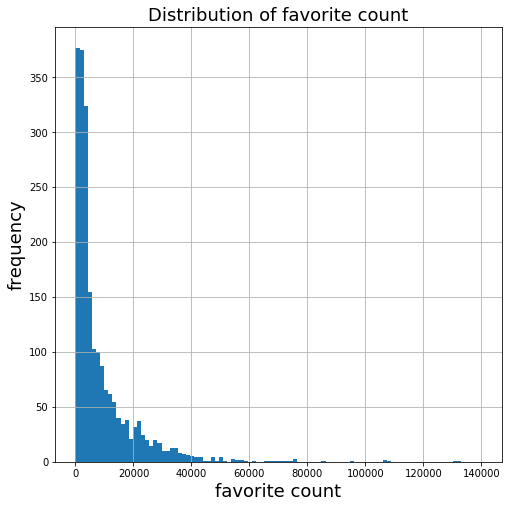

In [116]:
df['favorite_count'].hist(figsize = (8, 8), bins = np.linspace(0,140000, 100))
plt.xlabel('favorite count', fontsize = 18)
plt.ylabel('frequency', fontsize = 18)
plt.title('Distribution of favorite count', fontsize = 18);

The distribution of favorite_count is positively skewed with long tailed.

In [117]:
df.retweet_count.describe()

count     2117.000000
mean      2826.723666
std       4690.613712
min         16.000000
25%        638.000000
50%       1392.000000
75%       3265.000000
max      79515.000000
Name: retweet_count, dtype: float64

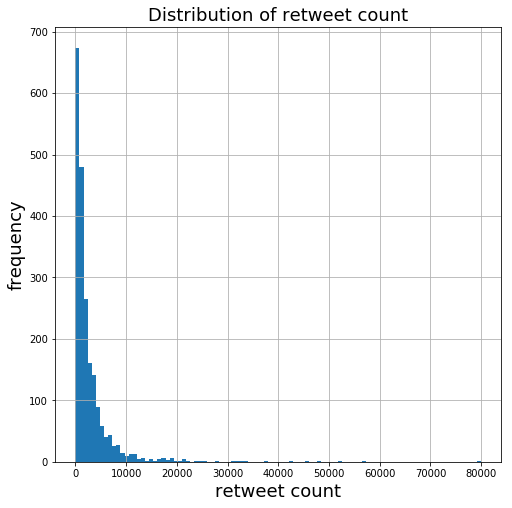

In [118]:
df['retweet_count'].hist(figsize = (8, 8), bins = np.linspace(0,80000, 100))
plt.xlabel('retweet count',fontsize = 18)
plt.ylabel('frequency', fontsize = 18)
plt.title('Distribution of retweet count', fontsize = 18);

Similar to the favorite_count, the distribution of retweet_count is positively skewed.

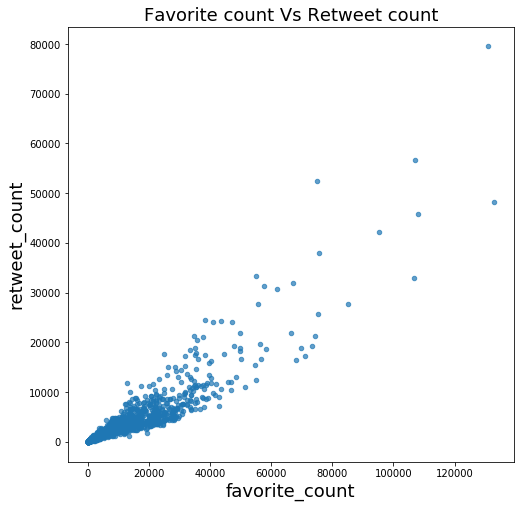

In [119]:
df.plot(x = 'favorite_count', y = 'retweet_count', kind = 'scatter', figsize = (8, 8), alpha = .7)
plt.xlabel('favorite_count', fontsize = 18)
plt.ylabel('retweet_count', fontsize = 18)
plt.title('Favorite count Vs Retweet count',fontsize = 18);

From the above plot we can see that there is a strong positive correlation between two variables. As favorite count increases, there is increase in retweet count.

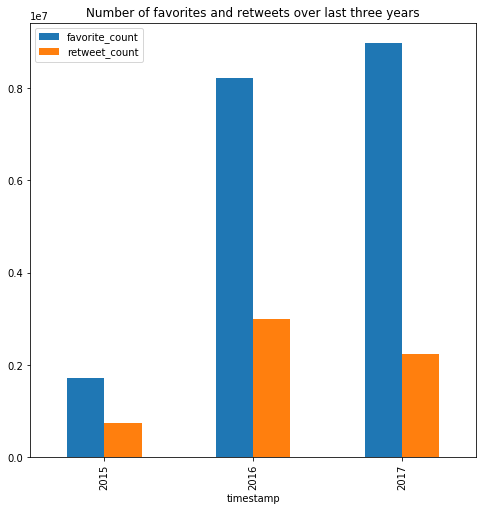

In [120]:
year = df["timestamp"].dt.year
fav_ret =df[['favorite_count','retweet_count']]
tweet = fav_ret.groupby(year).sum().plot(kind="bar",figsize = (8,8),title='Number of favorites and retweets over last three years')

The total favorite count has increased every year but the total retweet count has increased in 2016 and decreased in 2017.
